In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # for Label Encoder
import sklearn.cluster as cluster # for use KMeans Cluster
from kneed import KneeLocator # for generate Elbow Value

In [2]:
df=pd.read_csv("mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={"Annual Income (k$)":'income',"Spending Score (1-100)":'score'},inplace=True)

In [5]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.drop('CustomerID',axis=1,inplace=True)

In [7]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
le=LabelEncoder() # for Encoding

In [9]:
df.Gender=le.fit_transform(df.Gender)

In [10]:
df.head()

,Gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [11]:
df.rename(columns={'Gender':'gender','Age':'age'},inplace=True)

In [12]:
df.head()

,gender,age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# For Data Visualization

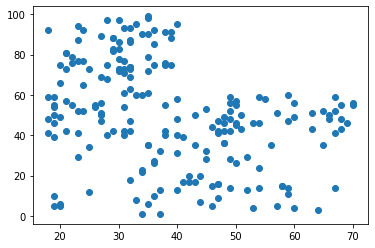

In [13]:
plt.scatter(df['age'],df['score'])

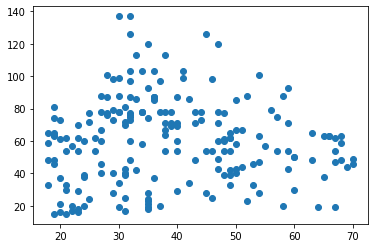

In [14]:
plt.scatter(df['age'],df['income'])

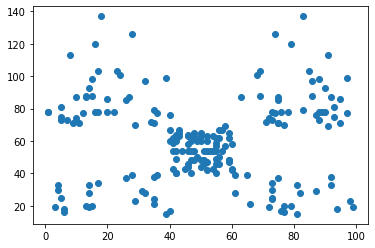

In [15]:
plt.scatter(df['score'],df['income'])

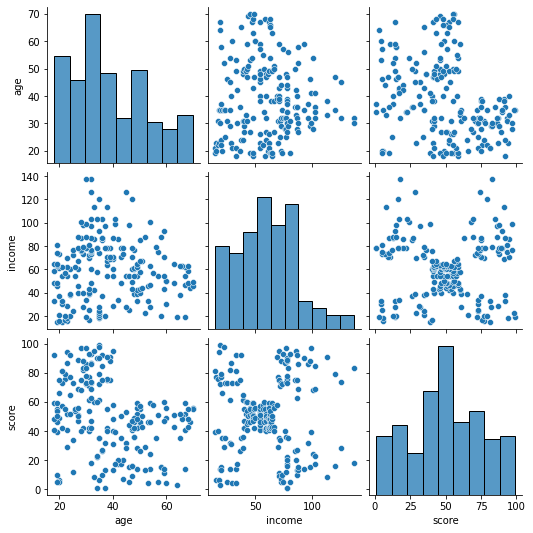

In [16]:
sns.pairplot(df[['age','income','score']])

# Select Optimal Number of Clusters
## using Elbow Method

In [17]:
wcss=[]
cluster_=range(1,15)
kMeans_=cluster.KMeans()

In [18]:
for i in cluster_:
    kMeans_=cluster.KMeans(n_clusters=i)
    kMeans_.fit(df[['income','score']])
    wcss.append(kMeans_.inertia_)

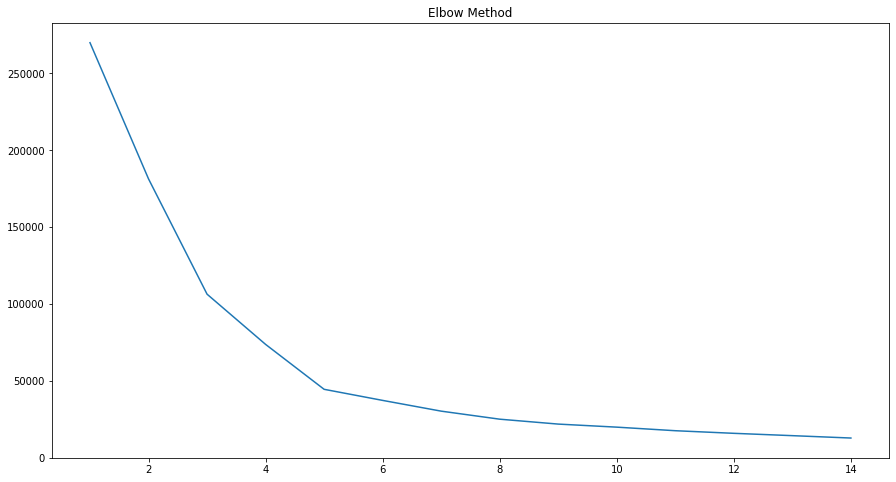

In [19]:
plt.figure(figsize=(15,8))
plt.title('Elbow Method')
plt.plot(cluster_,wcss)

In [20]:
kn=KneeLocator(cluster_,wcss,curve='convex',direction='decreasing')

In [21]:
kn.knee

5

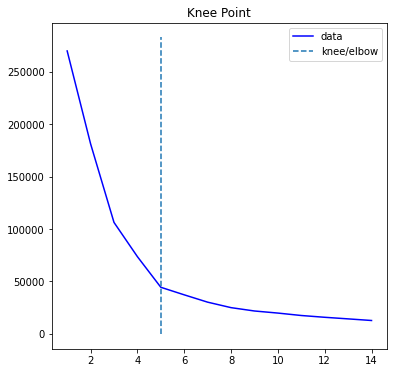

In [22]:
kn.plot_knee()

In [23]:
kMeans=cluster.KMeans(n_clusters=kn.knee)

In [24]:
df['5_clusters']=kMeans.fit_predict(df[['score','income']])

In [25]:
df.head()

,gender,age,income,score,5_clusters
0,1,19,15,39,4
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,4


In [26]:
centers5=kMeans.cluster_centers_

In [27]:
centers5

array([[79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783]])

In [28]:
df0=df[df['5_clusters']==0]
df1=df[df['5_clusters']==1]
df2=df[df['5_clusters']==2]
df3=df[df['5_clusters']==3]
df4=df[df['5_clusters']==4]

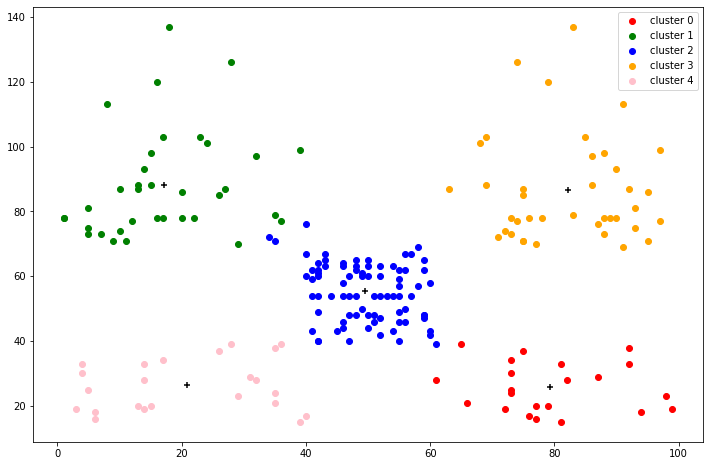

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(df0['score'],df0['income'],color='red',label='cluster 0')
plt.scatter(df1['score'],df1['income'],color='green',label='cluster 1')
plt.scatter(df2['score'],df2['income'],color='blue',label='cluster 2')
plt.scatter(df3['score'],df3['income'],color='orange',label='cluster 3')
plt.scatter(df4['score'],df4['income'],color='pink',label='cluster 4')
plt.scatter(centers5[:,0],centers5[:,1],color='black',marker='+')
plt.legend()